## Configuação da apresentação

In [184]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

#defina as dimensões da apresentação.
cm.update('rise', {
              'width': '100%',
              'height': '100%',
              'scroll': True,
              'backimage':None,
            'header': None,
            'footer':'Kaue Hermann'
              })

{'width': '100%', 'height': '100%', 'scroll': True, 'footer': 'Kaue Hermann'}

In [ ]:
50/1000

<font size = 6 color = 'green'>Movimento Browniano</font>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import seaborn as sns

# Movimento por andar aleatório

In [149]:
xi, yi = 0,0
print(xi,yi)

0 0


In [150]:
rd.choice([-1,1])

1

In [151]:
passos = 100
xi, yi = 0,0
x, y= xi, yi
Lx = [x]
Ly = [y]
for i in range(passos):
    x_c = rd.choice([1,-1])
    x = x + x_c
    Lx.append(x)
    y_c = rd.choice([1,-1])
    y = y + y_c
    Ly.append(y)

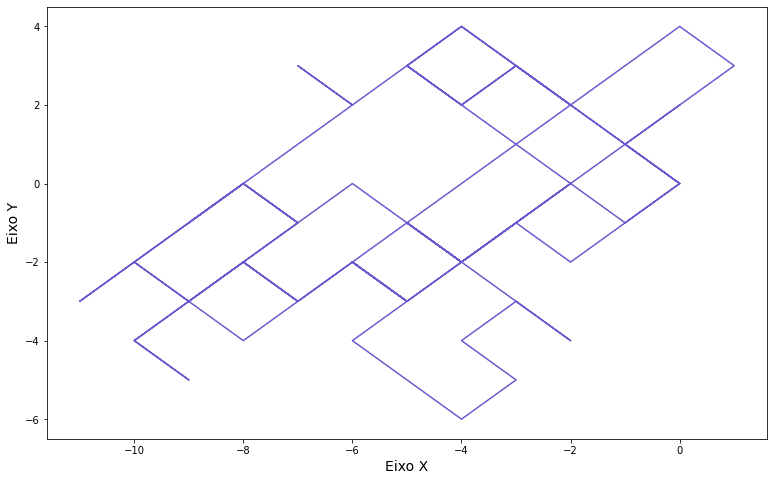

In [152]:
fig = plt.figure(figsize =(10,6))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(Lx, Ly, color = 'slateblue')
eixo.set_xlabel('Eixo X', fontsize = 14)
eixo.set_ylabel('Eixo Y', fontsize = 14)
plt.show()


In [153]:
N = 1000 #passos
T = 200 #Quantidade de partículas 
L_xm =[]
L_ym =[]
Lx = []
Ly = []
dxy = 0.2
for n in range(T): #T partículas andando
    xi, yi = 0,0
    x, y= xi, yi
    Lx.append(x)
    Lx = []
    Ly = []
    for i in range(N):  #Uma partícula andando
        x_c = rd.choice([1,-1])
        x = x + dxy*x_c
        Lx.append(x)
        y_c = rd.choice([1,-1])
        y = y + dxy*y_c
        Ly.append(y)
    L_xm.append(sum(Lx)/len(Lx))
    L_ym.append(sum(Ly)/len(Ly))

pd.DataFrame(np.array((L_xm,L_ym)).T, columns = ['Eixo x','Eixo y']).describe()


,Eixo x,Eixo y
count,200.000000,200.000000
mean,0.230704,-0.128576
std,3.874845,3.543898
min,-11.312400,-9.525600
25%,-2.428200,-2.373200
50%,0.294000,-0.167000
75%,2.904700,2.233300
max,10.832000,9.445600


In [154]:
N = 1000
T = 200
L_xl =[]
L_yl =[]
dxy = 0.2
for n in range(T): #Para todas as partículas
    Lx_m = []
    Ly_m = []
    xi, yi = 0,0
    x, y= xi, yi
    Lx = []
    Ly = []
    for n in range(N):
        Lx.append(x)
        Ly.append(y)
        x_c = rd.choice([1,-1])
        x = x + dxy*x_c
        Lx.append(x)
        y_c = rd.choice([1,-1])
        y = y + dxy*y_c
        Ly.append(y)
        Lx_m.append(sum(Lx)/len(Lx))
        Ly_m.append(sum(Ly)/len(Ly))
    L_xl.append(Lx_m)
    L_yl.append(Ly_m)

In [155]:
A_x = np.array(L_xl).T
A_y = np.array(L_yl).T

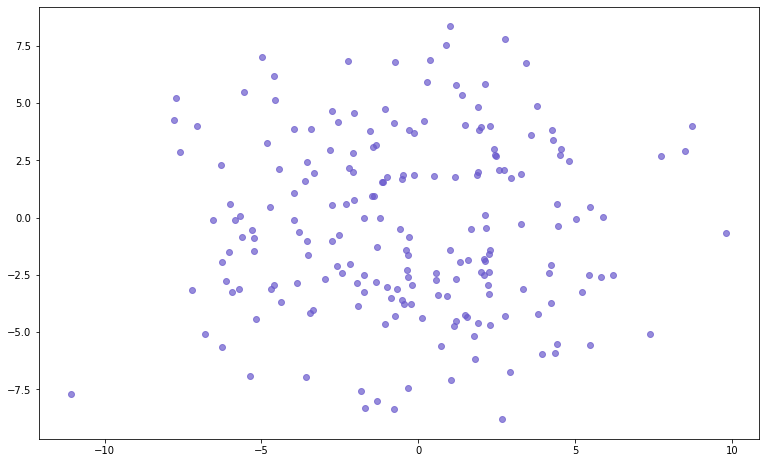

In [156]:
fig = plt.figure(figsize =(10,6))
eixo = fig.add_axes([0,0,1,1])

eixo.scatter(A_x[-1], A_y[-1], color = 'slateblue', alpha = 0.7)

In [ ]:
import matplotlib.animation as animation

In [ ]:
'''''fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,6)

def func_anim(idx):
    ax.clear()
    ax.scatter(A_x[idx], A_y[idx], color = 'slateblue', alpha = 0.7)
    plt.xlim(-7,7)
    plt.ylim(-7,7)
    #plt.draw()
anim = animation.FuncAnimation(fig, func_anim, frames = N-1, interval = 99 , blit = False,)
anim.save('Brownian.gif')''''''

In [ ]:
fig = plt.figure(figsize =(10,6))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(Lx, Ly, color = 'slateblue')


# Por Eq. Langevin

A equação de Langevin é escrita da seguinte forma:
$$ m.\frac{dv}{dt} = -\gamma v + \eta(t) $$

Onde $\eta$ é uma função **aleatória** chamada ruído

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import seaborn as sns

As contantes as serem usadas

gama = 
massa = 
kb = 1

# Estudando a força

In [3]:
np.random.random_sample()

0.5238623132018361

$$f(t) =\sqrt{6mK_bT.\delta(t-t')}.X$$

$$-1<X<1$$

In [3]:
X = np.random.random_sample()
Temp = 5
ti = 0
tf = 5
passos = 200
tempo = np.linspace(ti,tf,passos)
Deltat = tempo[1]
deltat = 1/(Deltat)
Amplitude = np.sqrt(6*Temp*deltat)
f = 2*(X-0.5)* Amplitude

forcas = []
rands =[]
for i in tempo:
    X = np.random.random_sample()
    forcas.append(2*(X-0.5)* Amplitude)
    rands.append(X)


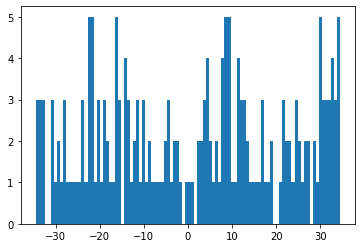

In [4]:
plt.hist(forcas,bins = 100)
plt.show()

# Escrevendo as funções

In [2]:
def acelera(v,Amp,gama):
    X = np.random.random_sample()
    return -gama*v + 2*(X-0.5)*Amp

# EDO para velocidade

In [4]:
Temp = 10
ti = 0
tf = 20
passos = 500
tempo = np.linspace(ti,tf,passos)
Deltat = tempo[1]
deltat = 1/(Deltat)
Kb = 2
gama = 1
Amplitude = np.sqrt(6*gama*Kb*Temp*deltat)

n_p = 5000

In [5]:
vo = 1
A_v = np.zeros((passos,n_p)).T
for particula in range(n_p):
    v = vo
    for passo in range(passos):
        A_v[particula][passo] = v
        dv = acelera(v,Amplitude,gama)
        v = v+dv*Deltat
    

In [6]:
varv = []
for item in range(passos):
    varv.append(A_v.T[item].var())

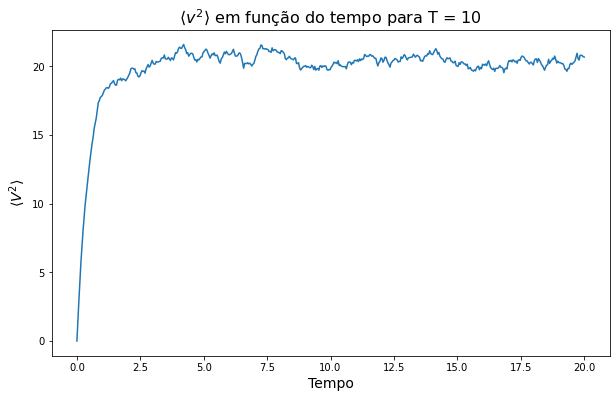

In [15]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, varv)

eixo.set_title(r'$\langle v^2 \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V^2\rangle$', fontsize = 14)
plt.savefig('DadosLangevin/V2_Tempo_Np5000.jpeg')
plt.show()

In [8]:
medv = []
for item in range(passos):
    medv.append(A_v.T[item].mean())

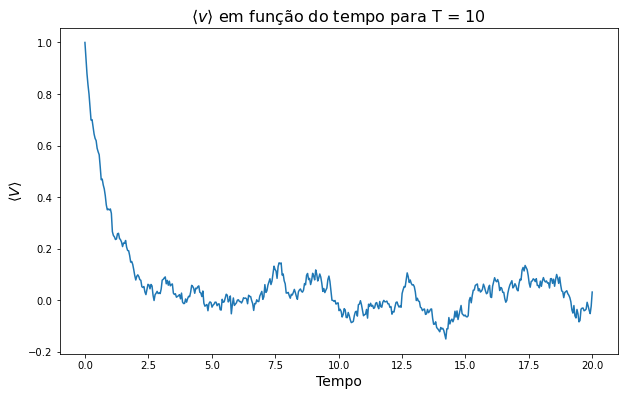

In [16]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, medv)

eixo.set_title(r'$\langle v \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V\rangle$', fontsize = 14)
plt.savefig('DadosLangevin/V_Tempo_Np5000.jpeg')
plt.show()

# Como gama altera a velocidade

In [10]:
gama = 0.5
Amplitude = np.sqrt(6*gama*Kb*Temp*deltat)

n_p = 5000
vo = 1
A_v1 = np.zeros((passos,n_p)).T
for particula in range(n_p):
    v = vo
    for passo in range(passos):
        A_v1[particula][passo] = v
        dv = acelera(v,Amplitude,gama)
        v = v+dv*Deltat
    

In [11]:
varv1 = []
for item in range(passos):
    varv1.append(A_v1.T[item].var())

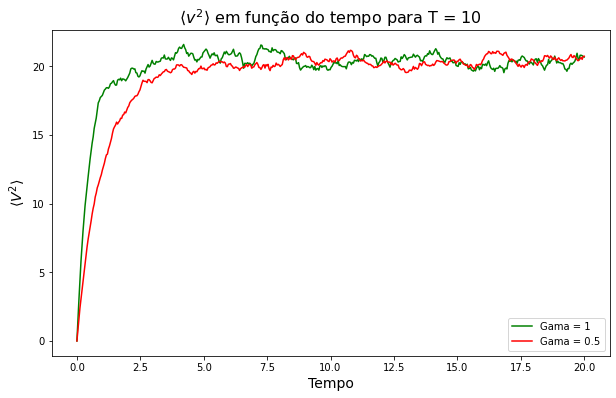

In [17]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, varv, color = 'g')
eixo.plot(tempo, varv1, color = 'r')

eixo.set_title(r'$\langle v^2 \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V^2\rangle$', fontsize = 14)

eixo.legend(['Gama = 1','Gama = 0.5'])

plt.savefig('DadosLangevin/V2_Tempo_Np5000_Gama.jpeg')

plt.show()

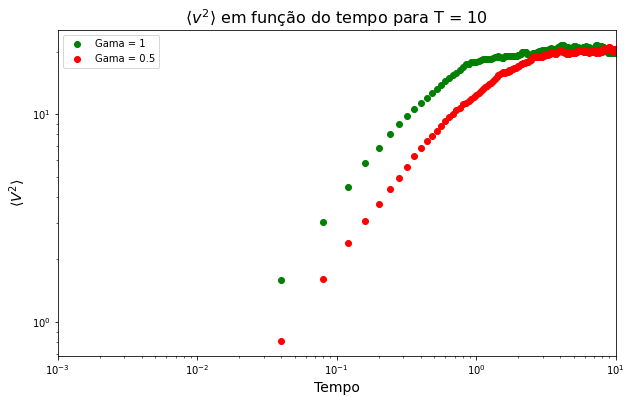

In [18]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.scatter(tempo, varv, color = 'g')
eixo.scatter(tempo, varv1, color = 'r')
plt.xscale('log')
plt.yscale('log')

plt.xlim(10e-4,10)

eixo.set_title(r'$\langle v^2 \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V^2\rangle$', fontsize = 14)

eixo.legend(['Gama = 1','Gama = 0.5'])
plt.savefig('DadosLangevin/V2_Tempo_Np5000_logGama.jpeg')

plt.show()

In [25]:
gamas = np.linspace(0.1,1,5)
gamas

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [26]:
for gama in gamas:
    print(gama)

0.1
0.325
0.55
0.775
1.0


In [28]:

vo = 1
n_p = 5000
Vars = []
for gama in gamas:
    gama = gama
    Amplitude = np.sqrt(6*gama*Kb*Temp*deltat)

    A_v = np.zeros((passos,n_p)).T
    for particula in range(n_p):
        v = vo
        for passo in range(passos):
            A_v[particula][passo] = v
            dv = acelera(v,Amplitude,gama)
            v = v+dv*Deltat
            
    varv1 = []
    for item in range(passos):
        varv1.append(A_v.T[item].var())
    Vars.append(varv1)

In [30]:
legenda = ['Gama = '+str(x) for x in gamas]
legenda

['Gama = 0.1', 'Gama = 0.325', 'Gama = 0.55', 'Gama = 0.775', 'Gama = 1.0']

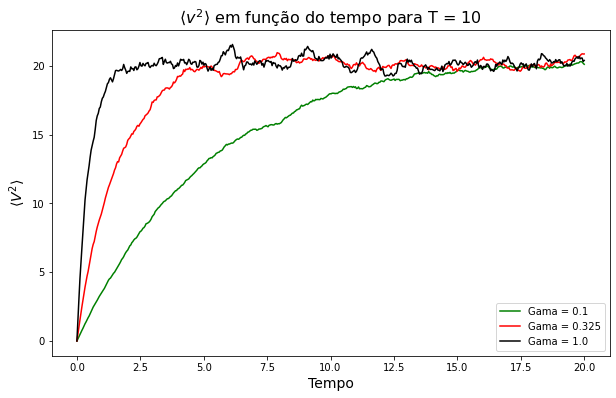

In [37]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, Vars[0], color = 'g')
eixo.plot(tempo, Vars[1], color = 'r')

eixo.plot(tempo, Vars[4], color = 'black')


eixo.set_title(r'$\langle v^2 \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V^2\rangle$', fontsize = 14)

eixo.legend([legenda[0],legenda[1],legenda[4]])

plt.savefig('DadosLangevin/V2_Tempo_Np5000_Gamas.jpeg')

plt.show()

### Por que uma curva converge mais rápida que a outra?
As diferenças entre as curvas são das pelo fator Gama. Este fator representa a intensidade da resistência do fluido nas partículas em movimento. Seu comportamento, neste sentido, é agir como uma aceleração negativa, diminuindo a velocidade até o valor igual a zero. A resistência ocorre a todo momento em que a velocidade é diferente de zero. Neste cenário, as colisão impulsionam as partículas e a resistência impede o movimento. Com a diminuição da intensidade da resistência leva-se mais tempo para a velocidade atingir o valor médio de zero, e o valor médio quadrático de $K_b.T$

# Posição

In [117]:
deltat

24.95

In [164]:
ti = 0
tf = 20
passos = 500
tempo = np.linspace(ti,tf,passos)
Deltat = tempo[1]
deltat = 1/(Deltat)

gama, Kb =1,1 
Amplitude = np.sqrt(6*gama*Kb*Temp*deltat)

n_p = 50000
vo = 0
xo = 0
A_x = np.zeros((passos,n_p)).T
for particula in range(n_p):
    v = vo
    x = xo
    for passo in range(passos):
        A_x[particula][passo] = x
        dv = acelera(v,Amplitude,gama)
        
        v = v+dv*Deltat
        x = x + v*Deltat
        
    

In [165]:
A_x.T[-1].mean()

-0.031108161495919703

In [166]:
varx = []
medx = []
for item in range(passos):
    varx.append(A_x.T[item].var())
    medx.append(A_x.T[item].mean())

In [167]:
sum(medx)/len(medx)

-0.016397671087309218

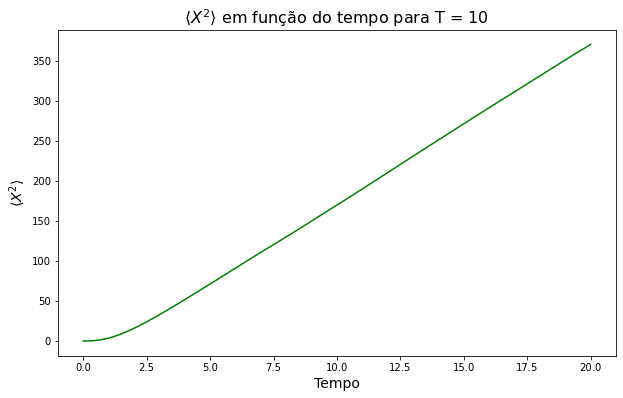

In [170]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, varx, color = 'g')



eixo.set_title(r'$\langle X^2 \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle X^2\rangle$', fontsize = 14)



plt.savefig('DadosLangevin/X2_Tempo_Np5000.jpeg')

plt.show()

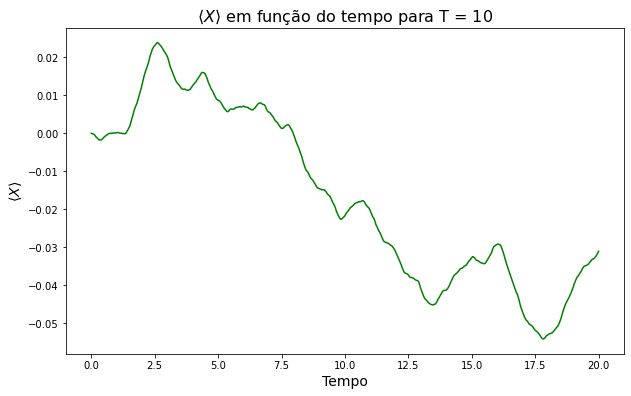

In [171]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, medx, color = 'g')



eixo.set_title(r'$\langle X \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle X\rangle$', fontsize = 14)



plt.savefig('DadosLangevin/V_Tempo_Np5000.jpeg')

plt.show()

In [172]:

n_p = 50000
vo = 1
xo = 0
A_x = np.zeros((passos,n_p)).T
A_v = np.zeros((passos,n_p)).T
for particula in range(n_p):
    v = vo
    x = xo
    for passo in range(passos):
        A_v[particula][passo] = v
        A_x[particula][passo] = x
        dv = acelera(v,Amplitude,gama)
        
        v = v+dv*Deltat
        x = x + v*Deltat
        
    

In [178]:
medx = []
medv = []
for item in range(passos):
    medx.append(A_x.T[item].mean())
    medv.append(A_v.T[item].mean())

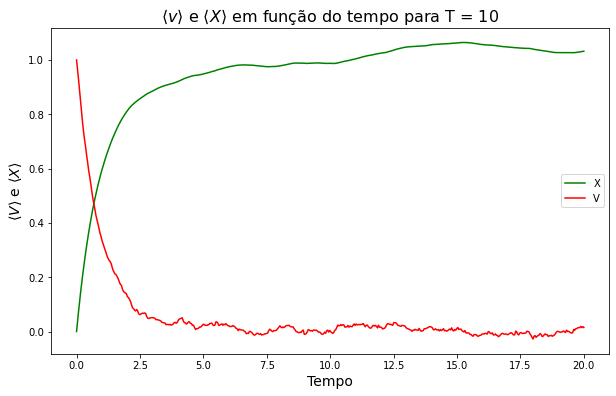

In [180]:
fix, eixo = plt.subplots(figsize = (10,6))

eixo.plot(tempo, medx, color = 'g')
eixo.plot(tempo, medv, color = 'r')



eixo.set_title(r'$\langle v \rangle$ e $\langle X \rangle$ em função do tempo para T = 10', fontsize = 16)
eixo.set_xlabel('Tempo', fontsize = 14)
eixo.set_ylabel(r'$\langle V\rangle$ e $\langle X \rangle$', fontsize = 14)

eixo.legend(['X','V'])

plt.savefig('DadosLangevin/VX_Tempo_Np5000_V1.jpeg')

plt.show()

# Apresentação

## Como escrever a força

$$f(t) =\sqrt{6mK_bT.\delta(t-t')}.X$$

$$-1<X<1$$

## Como alterar velocidade
$$a = -\gamma v + f(t)$$
$$v(t + dt) = v + a$$

**Correto:**
$$v(t + dt) = v + a.dt$$

## Detalhes da Simulação
$$Kb = 2; T = 1; Gama = 1$$
$$N_p= 50.10^3, dt = 0.025$$


<img src="DadosLangevin/V2_Tempo_Np5000.jpeg" width="1000" hight = "1000"/>


<img src="DadosLangevin/V2_Tempo_Np5000_Gamas.jpeg" width="1200" hight = "1000"/>

<font color = 'green' size = 8> Por que uma curva converge mais rápida que a outra?</font>

As diferenças entre as curvas são dadas pelo fator Gama. Este fator representa a intensidade da resistência do fluido nas partículas em movimento. Seu comportamento, neste sentido, é agir como uma aceleração negativa, diminuindo a velocidade até o valor igual a zero. A resistência ocorre a todo momento em que a velocidade é diferente de zero. Neste cenário, as colisão impulsionam as partículas e a resistência impede o movimento. Com a diminuição da intensidade da resistência leva-se mais tempo para a velocidade atingir o valor médio de zero, e o valor médio quadrático de $K_b.T$


<img src="DadosLangevin/V2_Tempo_Np5000_logGama.jpeg" width="1200" hight = "1000"/>


<img src="DadosLangevin/V_Tempo_Np5000.jpeg" width="1200" hight = "1000"/>


<img src="DadosLangevin/X2_Tempo_Np5000.jpeg" width="1200" hight = "1000"/>


<img src="DadosLangevin/VX_Tempo_Np5000_V1.jpeg" width="1200" hight = "1000"/>